In [1]:
import tclab
import numpy
import pandas

import tbcontrol
from tbcontrol import blocksim

import matplotlib.pyplot as plt
from latex_figure import plotfigure

import datetime

In [2]:
run_length = 2000

In [3]:
Names = ['CC P', 'CC PI', 'CC PID', 'IAE Setpoint PI', 'IAE Setpoint PID', 'IAE Distrurbance P', 'IAE Distrurbance PI', 'IAE Distrurbance PID']

In [14]:
# data_frame = pandas.read_csv("Controller Testing.csv", usecols = ['Time', 'T1', 'Q1']).drop_duplicates(subset = 'Time')
data_frame = pandas.read_csv("Controller Testing.csv", usecols = ['Time', 'T1', 'Q1'], index_col='Time')
data_frame = data_frame.loc[~data_frame.index.duplicated(keep='first')]
data_frame

,T1,Q1
Time,,
0.0,48.95,51.30
1.0,48.95,65.12
3.0,48.62,65.12
5.0,48.62,65.12
6.0,48.62,69.87
...,...,...
15996.0,59.90,70.43
15997.0,60.23,52.71
15998.0,59.90,77.40


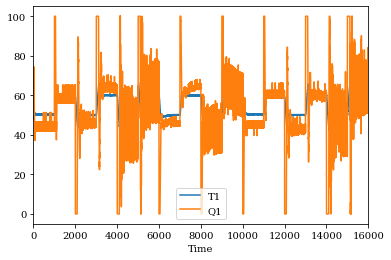

In [15]:
data_frame.plot()

In [37]:
from matplotlib import rc

In [38]:
rc("text", usetex=False)
rc("font", family="serif")

In [39]:
aspect_ratio = 4 / 5
FULLSIZE = 5, 5 * aspect_ratio
HALFSIZE = 3, 3 * aspect_ratio

CC P 1
Length 1996
CC PI 2
Length 2000
CC PID 3
Length 2001
IAE Setpoint PI 4
Length 2001
IAE Setpoint PID 5
Length 2001
IAE Distrurbance P 6
Length 2001
IAE Distrurbance PI 7
Length 1994
IAE Distrurbance PID 8
Length 2001


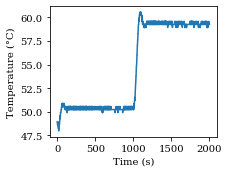

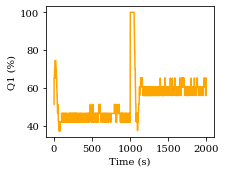

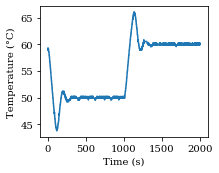

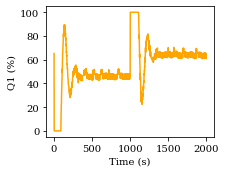

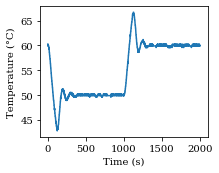

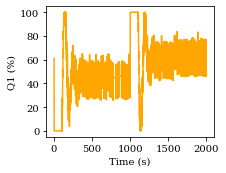

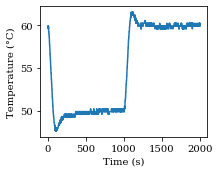

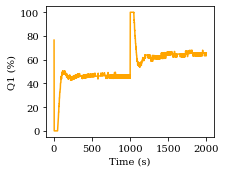

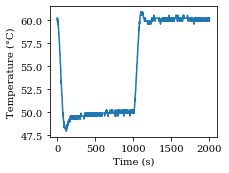

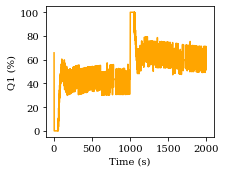

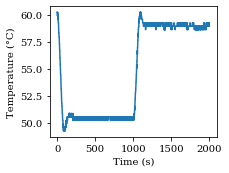

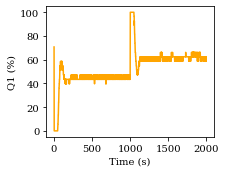

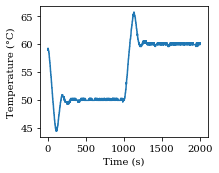

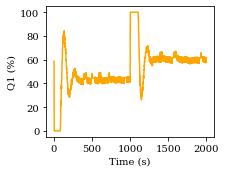

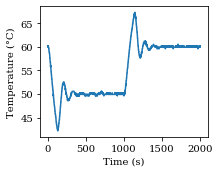

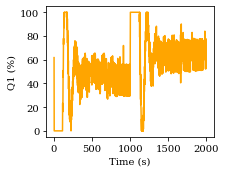

In [41]:
checker = 1
lower = 0
for index, row in data_frame.iterrows():
#     print (index/2000, checker)
    if index/2000 >= checker:
        upper = index
        print (Names[checker-1], checker)
        
        
        
        plt.figure(figsize = HALFSIZE)        
        plt.plot(data_frame[lower:upper].index - lower, data_frame[lower:upper]['T1'])
        plt.xlabel('Time (s)')
        plt.ylabel('Temperature (\u00B0C)')
        plt.savefig(r'PDFS\Setpoint\\' + Names[checker-1] + ' - Temperature.pdf')
        
        plt.figure(figsize = HALFSIZE)    
        plt.plot(data_frame[lower:upper].index - lower, data_frame[lower:upper]['Q1'], 'orange')
        plt.xlabel('Time (s)')
        plt.ylabel('Q1 (%)')
        plt.savefig(r'PDFS\Setpoint\\' + Names[checker-1] + ' - Heater Fraction.pdf')
        
        print ('Length',len(data_frame[lower:upper]['T1']))
        
        checker+=1
        lower = index